# 1 Introduction 

The Canadian Internet Use Survey (CIUS) public use microdata file (PUMF) contains information on the adoption and use of digital technologies, as well as online behaviours, of people aged 15 and up living in Canada's ten provinces.

The survey is based on the previous iteration of the CIUS, which was last administered in 2012. While there is some overlap with the 2012 CIUS, the 2018 survey was redesigned to reflect the rapid evolution of Internet technology since the previous survey iteration.

We used the IndividualUse data set in order to perform explanatory data analysis and predictive data analysis. Our primary focus is to identify the pattern of internet usage by people in various provinces across Canada. We tried to identify the factors which influence users to use the internet. In order to do that, we categorize our respondents according to gender, region, age group, and education level. 

After conducting an exploratory data analysis and analyzing the survey data, it was discovered that females are using more internet compared to males, and most users fall under the age bracket of 16 to 24, however, the 45 to 54 age group people use the internet for long hours. It is also found that amongst all the provinces, most internet is used in Ontario whereas the least internet is used in Prince Edward Island. After the analysis, the objective is to boost internet usage by users in all the provinces of Canada. 

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [173]:
data = pd.read_csv('IndividualUse.csv')

# 2 Exploratory Data Analysis (EDA)

EDA, or exploratory data analysis, is a technique for extracting insights from data. Data Scientists and Analysts use statistical graphs and other visualisation techniques to search for patterns, relationships, and anomalies in data.

We used various plots in order to understand and classify respondents according to province, age, gender, and community.  

### Data Pre-processing

Any type of processing performed on raw data to prepare it for another data processing procedure is referred to as data pre-processing.

### Data before pre-processing

The data codes or representation at the time of collection may not be readable or make sense to data users, necessitating pre-processing and renaming dimensions/columns for easy understanding.

In [174]:
data.head()

,PUMFID,PROVINCE,REGION,G_URBRUR,GCAGEGR6,CSEX,G_CEDUC,G_CSTUD,G_CLFSST,GFAMTYPE,...,IU_G01,IU_Q01G,IU_Q02A,IU_Q02B,IU_Q02E,IU_G02,IU_Q03,IU_Q04,IU_Q05,IU_Q06
0,1,35,3,5,3,2,3,2,1,3,...,2,2,2,1,2,2,2,1,1,6
1,2,46,4,5,1,2,1,1,2,2,...,2,2,1,2,2,2,1,1,6,6
2,3,10,1,5,2,1,2,2,1,2,...,2,2,1,2,2,1,1,2,6,6
3,4,35,3,4,5,2,2,2,3,3,...,6,6,6,6,6,6,6,96,6,6
4,5,13,1,4,3,1,2,2,1,2,...,2,2,1,1,2,2,3,1,6,6


In [175]:
data = data.rename(columns={'PROVINCE': 'Province', 'REGION': 'Region', 'G_URBRUR': 'CommunityOfRespondent', 
                            'GCAGEGR6': 'Age', 'CSEX': 'Sex', 'G_CEDUC': 'Education', 'G_CSTUD': 'IsStudent', 
                            'G_CLFSST': 'EmploymentStatus', 'GFAMTYPE': 'HousholdType', 'G_HHSIZE': 'HouseholdSize', 
                            'G_HEDUC': 'HighestEductionHousehold', 'G_HSTUD': 'StudentInHousehold', 
                            'EV_Q01': 'HaveUsedInternet', 'EV_Q02': 'YearsUsedInternet', 
                            'IU_Q01A': 'InternetThroughTelephoneline', 'IU_Q01B': 'InternetThroughCableline', 
                            'IU_Q01E': 'InternetThroughWireless', 'IU_G01': 'InternetThroughOther', 
                            'IU_Q01G': 'InternetThroughNotConnected', 'IU_Q02A': 'InternetAccessDevicePersonalComputer', 
                            'IU_Q02B': 'InternetAccessDevicePortableComputer', 'IU_Q02E': 'InternetAccessDeviceWireless', 
                            'IU_G02': 'InternetAccessDeviceOther', 'IU_Q03': 'InternetUsage', 
                            'IU_Q04': 'InternetUsageInHoursPerWeek', 'IU_Q05': 'InternetThroughHighSpeedConnection', 
                            'IU_Q06': 'HighSpeedInternetAvailable'})

In [176]:
def colRecodeProvince(startCol, endCol):
    for i in range(startCol-1, endCol):
        data.loc[data.iloc[:,i] == 10, data.columns[i]] = 'Newfoundland and Labrador'
        data.loc[data.iloc[:,i] == 11, data.columns[i]] = 'Prince Edward Island'
        data.loc[data.iloc[:,i] == 12, data.columns[i]] = 'Nova Scotia'
        data.loc[data.iloc[:,i] == 13, data.columns[i]] = 'New Brunswick'
        data.loc[data.iloc[:,i] == 24, data.columns[i]] = 'Quebec'
        data.loc[data.iloc[:,i] == 35, data.columns[i]] = 'Ontario'
        data.loc[data.iloc[:,i] == 46, data.columns[i]] = 'Manitoba'
        data.loc[data.iloc[:,i] == 47, data.columns[i]] = 'Saskatchewan'
        data.loc[data.iloc[:,i] == 48, data.columns[i]] = 'Alberta'
        data.loc[data.iloc[:,i] == 59, data.columns[i]] = 'British Columbia'

colRecodeProvince(2, 2)

def colRecodeRegion(startCol, endCol):
    for i in range(startCol-1, endCol):
        data.loc[data.iloc[:, i] == 1, data.columns[i]] = 'Atlantic Region'
        data.loc[data.iloc[:, i] == 2, data.columns[i]] = 'Quebec'
        data.loc[data.iloc[:, i] == 3, data.columns[i]] = 'Ontario'
        data.loc[data.iloc[:, i] == 4, data.columns[i]] = 'Manitoba/Saskatchewan'
        data.loc[data.iloc[:, i] == 5, data.columns[i]] = 'Alberta'
        data.loc[data.iloc[:, i] == 6, data.columns[i]] = 'British Columbia'
colRecodeRegion(3,3)

def colRecodeCommunity(startCol, endCol):
    for i in range(startCol-1, endCol):
        data.loc[data.iloc[:, i] == 1, data.columns[i]] ='Montreal'
        data.loc[data.iloc[:, i] == 2, data.columns[i]] ='Toronto'
        data.loc[data.iloc[:, i] == 3, data.columns[i]] ='Vancouver'
        data.loc[data.iloc[:, i] == 4, data.columns[i]] ='Other Urban excluding Prince Edward Island'
        data.loc[data.iloc[:, i] == 5, data.columns[i]] ='Rural excluding Prince Edward Island'
        data.loc[data.iloc[:, i] == 6, data.columns[i]] ='Prince Edward Island'
colRecodeCommunity(4,4)
        
def colRecodeAge(startCol, endCol):
    for i in range(startCol-1, endCol):
        data.loc[data.iloc[:, i] == 1, data.columns[i]] = '16 to 24'
        data.loc[data.iloc[:, i] == 2, data.columns[i]] = '25 to 34'
        data.loc[data.iloc[:, i] == 3, data.columns[i]] = '35 to 44'
        data.loc[data.iloc[:, i] == 4, data.columns[i]] = '45 to 54'
        data.loc[data.iloc[:, i] == 5, data.columns[i]] = '55 to 64'
        data.loc[data.iloc[:, i] == 6, data.columns[i]] = '65 and older'
colRecodeAge(5,5)

def colRecodeSex(startCol, endCol):
    for i in range(startCol-1, endCol):
        data.loc[data.iloc[:, i] == 1, data.columns[i]] = 'Male'
        data.loc[data.iloc[:, i] == 2, data.columns[i]] = 'Female'  
colRecodeSex(6,6)

def colRecodeEducation(startCol, endCol):
    for i in range(startCol-1, endCol):
        data.loc[data.iloc[:, i] == 1, data.columns[i]] = 'High School or less'
        data.loc[data.iloc[:, i] == 2, data.columns[i]] = 'College or some post-secondary'
        data.loc[data.iloc[:, i] == 3, data.columns[i]] = 'University Certificate or degree'
colRecodeEducation(7,7)

def colRecodeYesNo(startCol, endCol):
    for i in range(startCol-1, endCol):
        data.loc[data.iloc[:, i] == 1, data.columns[i]] = 'Yes'
        data.loc[data.iloc[:, i] == 2, data.columns[i]] = 'No'
colRecodeYesNo(8,8)

def colRecodeEmploymentStatus(startCol, endCol):
    for i in range(startCol-1, endCol):
        data.loc[data.iloc[:, i] == 1, data.columns[i]] = 'Employed at work/absent from work'
        data.loc[data.iloc[:, i] == 2, data.columns[i]] = 'Unemployed/temporary layoff/job searcher'
        data.loc[data.iloc[:, i] == 3, data.columns[i]] = 'Not in the labour force,able to work/pemanently unable to work'
colRecodeEmploymentStatus(9,9)

def colRecodeHouseholdType(startCol, endCol):
    for i in range(startCol-1, endCol):
        data.loc[data.iloc[:, i] == 1, data.columns[i]] = 'Single family household with unmarried children under 16'
        data.loc[data.iloc[:, i] == 2, data.columns[i]] = 'Single family household without unmarried children under 16'
        data.loc[data.iloc[:, i] == 3, data.columns[i]] = 'One person households'
        data.loc[data.iloc[:, i] == 4, data.columns[i]] = 'Multi Family Household'  
colRecodeHouseholdType(10,10)

def colRecodeHouseholdSize(startCol, endCol):
    for i in range(startCol-1, endCol):
        data.loc[data.iloc[:, i] == 1, data.columns[i]] = '1 person'
        data.loc[data.iloc[:, i] == 2, data.columns[i]] = '2 persons'
        data.loc[data.iloc[:, i] == 3, data.columns[i]] = '3 persons'
        data.loc[data.iloc[:, i] == 4, data.columns[i]] = '4 or more persons'  
colRecodeHouseholdSize(11,11)

def colRecodeHighestEducationHousehold(startCol, endCol):
    for i in range(startCol-1, endCol):
        data.loc[data.iloc[:, i] == 1, data.columns[i]] = 'High school or less'
        data.loc[data.iloc[:, i] == 2, data.columns[i]] = 'College or some post-secondary'
        data.loc[data.iloc[:, i] == 3, data.columns[i]] = 'University certificate or degree'
colRecodeHighestEducationHousehold(12,12)
colRecodeYesNo(13,14)

def colRecodeYearsUsedInternet(startCol, endCol):
    for i in range(startCol-1, endCol):
        data.loc[data.iloc[:, i] == 1, data.columns[i]] = 'Less than 1 year'
        data.loc[data.iloc[:, i] == 2, data.columns[i]] = '1 to 2 years(1 year or more but less than 2 years)'
        data.loc[data.iloc[:, i] == 3, data.columns[i]] = '2 to 5 years(2 years or more but less than 5 years)'
        data.loc[data.iloc[:, i] == 4, data.columns[i]] = '5 or more years'
        data.loc[data.iloc[:, i] == 6, data.columns[i]] = 'Valid Skip'
        data.loc[data.iloc[:, i] == 7, data.columns[i]] = 'Dont Know'
        data.loc[data.iloc[:, i] == 8, data.columns[i]] = 'Refusal'
colRecodeYearsUsedInternet(15,15)
 
def colRecodeYesNoValidskip(startCol, endCol):
    for i in range(startCol-1, endCol):
        data.loc[data.iloc[:, i] == 1, data.columns[i]] = 'Yes'
        data.loc[data.iloc[:, i] == 2, data.columns[i]] = 'No'
        data.loc[data.iloc[:, i] == 6, data.columns[i]] = 'Valid Skip'
        data.loc[data.iloc[:, i] == 7, data.columns[i]] = 'Don\'t Know'
        data.loc[data.iloc[:, i] == 8, data.columns[i]] = 'Refusal'
        data.loc[data.iloc[:, i] == 9, data.columns[i]] = 'Not Stated'
colRecodeYesNoValidskip(16,24)

def colRecodeInternetUsage(startCol, endCol):
    for i in range(startCol-1, endCol):
        data.loc[data.iloc[:, i] == 1, data.columns[i]] = 'At least once a day'
        data.loc[data.iloc[:, i] == 2, data.columns[i]] = 'At least once a week(but not everyday)'
        data.loc[data.iloc[:, i] == 3, data.columns[i]] = 'At least once a month(but not every week)'
        data.loc[data.iloc[:, i] == 4, data.columns[i]] = 'Less than once a month'
        data.loc[data.iloc[:, i] == 6, data.columns[i]] = 'Valid Skip'
        data.loc[data.iloc[:, i] == 7, data.columns[i]] = 'Don\'t Know'
        data.loc[data.iloc[:, i] == 8, data.columns[i]] = 'Refusal'
        data.loc[data.iloc[:, i] == 9, data.columns[i]] = 'Not Stated'
colRecodeInternetUsage(25,25)

def colRecodeInternetUsageInHoursPerWeek(startCol, endCol):
    for i in range(startCol-1, endCol):
        data.loc[data.iloc[:, i] == 1, data.columns[i]] = 'Less than 5 hours'
        data.loc[data.iloc[:, i] == 2, data.columns[i]] = 'Between 5 and 9 hours'
        data.loc[data.iloc[:, i] == 3, data.columns[i]] = 'Between 10 and 19 hours'
        data.loc[data.iloc[:, i] == 4, data.columns[i]] = 'Between 20 and 29 hours'
        data.loc[data.iloc[:, i] == 5, data.columns[i]] = 'Between 30 and 39 hours'
        data.loc[data.iloc[:, i] == 6, data.columns[i]] = '40 hours or more per week'
        data.loc[data.iloc[:, i] == 96, data.columns[i]] = 'Valid Skip'
        data.loc[data.iloc[:, i] == 97, data.columns[i]] = 'Don\'t Know'
        data.loc[data.iloc[:, i] == 98, data.columns[i]] = 'Refusal'
        data.loc[data.iloc[:, i] == 99, data.columns[i]] = 'Not Stated'
colRecodeInternetUsageInHoursPerWeek(26,26)

colRecodeYesNoValidskip(27,28)

data.drop('PUMFID', inplace=True, axis = 1)


### Data after pre-processing

After pre-processing, the data gives a better clarity on understanding the variables.

In [177]:
data.head()

,Province,Region,CommunityOfRespondent,Age,Sex,Education,IsStudent,EmploymentStatus,HousholdType,HouseholdSize,...,InternetThroughOther,InternetThroughNotConnected,InternetAccessDevicePersonalComputer,InternetAccessDevicePortableComputer,InternetAccessDeviceWireless,InternetAccessDeviceOther,InternetUsage,InternetUsageInHoursPerWeek,InternetThroughHighSpeedConnection,HighSpeedInternetAvailable
0,Ontario,Ontario,Rural excluding Prince Edward Island,35 to 44,Female,University Certificate or degree,No,Employed at work/absent from work,One person households,1 person,...,No,No,No,Yes,No,No,At least once a week(but not everyday),Less than 5 hours,Yes,Valid Skip
1,Manitoba,Manitoba/Saskatchewan,Rural excluding Prince Edward Island,16 to 24,Female,High School or less,Yes,Unemployed/temporary layoff/job searcher,Single family household without unmarried chil...,3 persons,...,No,No,Yes,No,No,No,At least once a day,Less than 5 hours,Valid Skip,Valid Skip
2,Newfoundland and Labrador,Atlantic Region,Rural excluding Prince Edward Island,25 to 34,Male,College or some post-secondary,No,Employed at work/absent from work,Single family household without unmarried chil...,2 persons,...,No,No,Yes,No,No,Yes,At least once a day,Between 5 and 9 hours,Valid Skip,Valid Skip
3,Ontario,Ontario,Other Urban excluding Prince Edward Island,55 to 64,Female,College or some post-secondary,No,"Not in the labour force,able to work/pemanentl...",One person households,1 person,...,Valid Skip,Valid Skip,Valid Skip,Valid Skip,Valid Skip,Valid Skip,Valid Skip,Valid Skip,Valid Skip,Valid Skip
4,New Brunswick,Atlantic Region,Other Urban excluding Prince Edward Island,35 to 44,Male,College or some post-secondary,No,Employed at work/absent from work,Single family household without unmarried chil...,3 persons,...,No,No,Yes,Yes,No,No,At least once a month(but not every week),Less than 5 hours,Valid Skip,Valid Skip


In [178]:
sns.set(style = 'darkgrid', rc = {'figure.figsize':(15,6)})
colors = sns.color_palette('colorblind')[0:5]

## 2.1 Survey Respondent Demographics

### Number of Respondents by Province

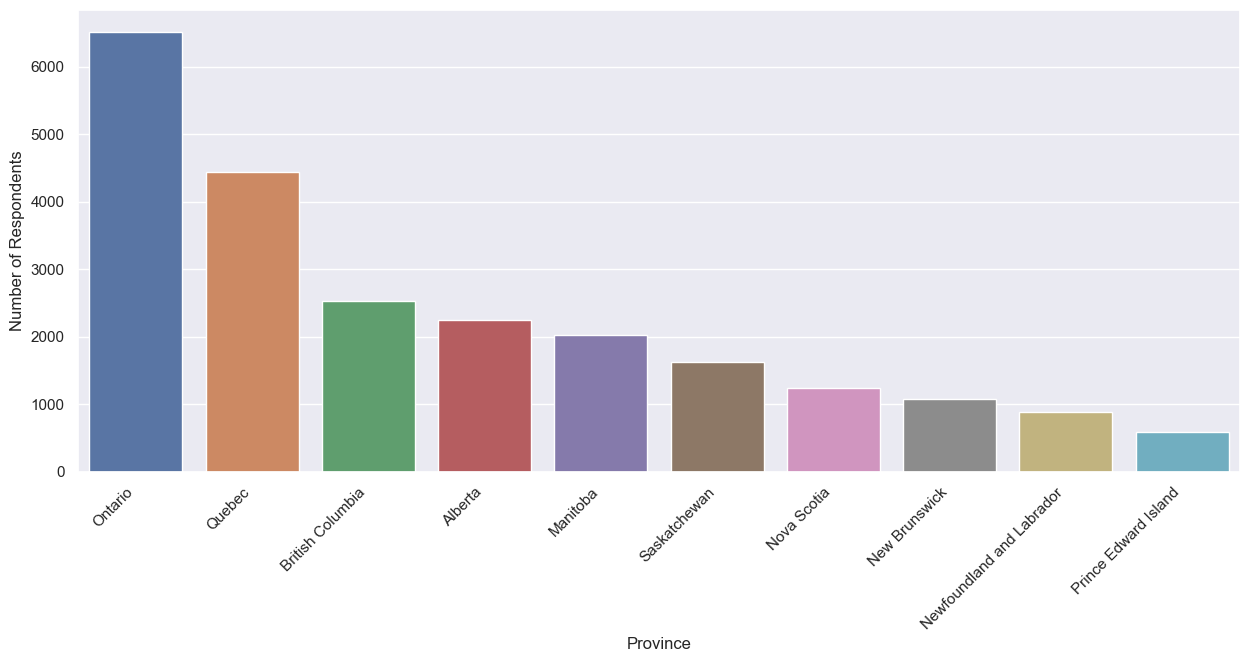

In [179]:
sns.countplot(x='Province', data=data, order = data['Province'].value_counts().index)
plt.xlabel('Province')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.show()

<li> Out of the total respondents, more than 65% (approximately 13,000) are from three major provinces:Ontario, Quebec, and British Columbia. </li>

<li> Ontario has the highest number of respondents (more than 6000) and the second highest was from Quebec (more than 4000) whereas the lowest number of respondents were from Prince Edward Island (approximately 600) and the second lowest was from Newfoundland and Labrador (approximately 900) </li> 

### Number of Respondents by Community

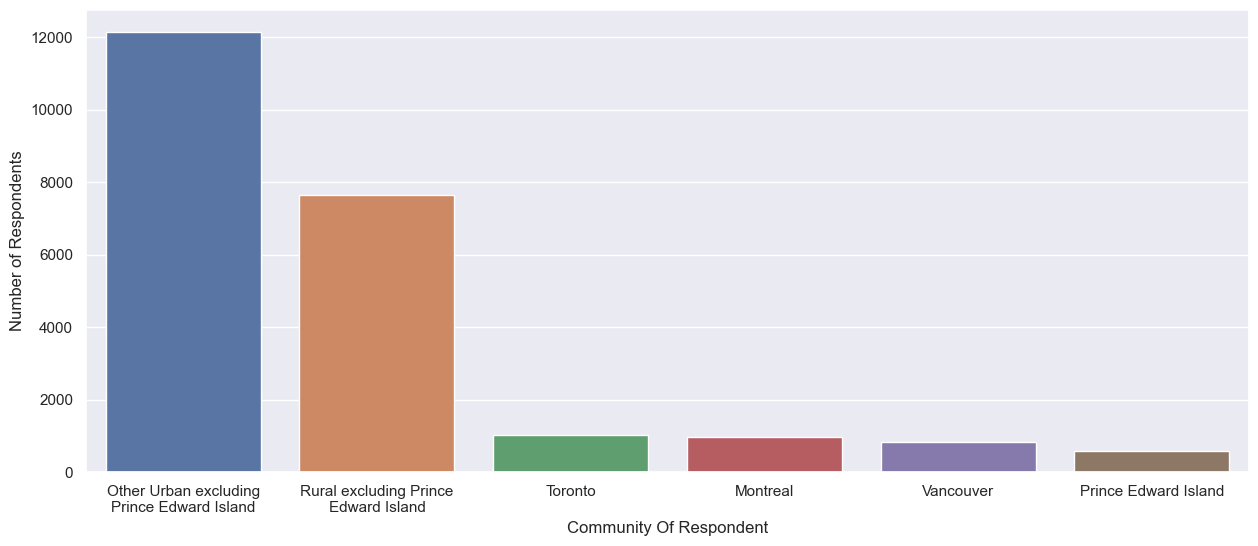

In [180]:
ax = sns.countplot(x='CommunityOfRespondent', data=data, order = data['CommunityOfRespondent'].value_counts().index)
labels = [textwrap.fill(label.get_text(), 25) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels);
plt.xlabel('Community Of Respondent')
plt.ylabel('Number of Respondents')
plt.show()

<li> Approximately 12,000 respondents were from “Other Urban excluding Prince Edward Island Community and approximately 7,500 respondents were from “Rural excluding Prince Edward Island Community. </li> 

<li> The lowest number of respondents were from the Prince Edward Island community. </li>

### Number of Respondents by Age

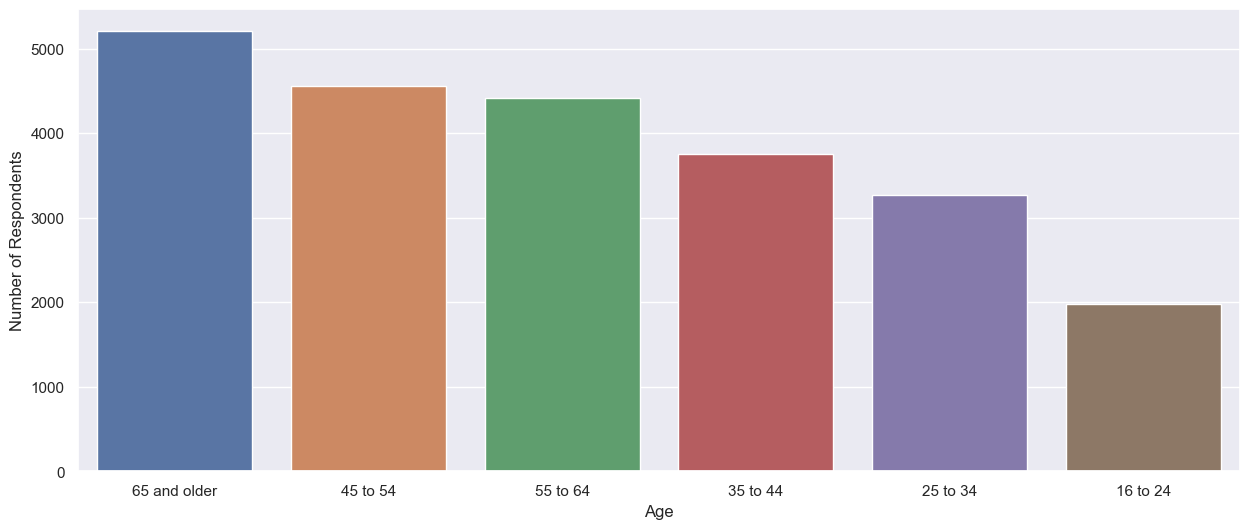

In [181]:
sns.countplot(x='Age', data=data, order = data['Age'].value_counts().index)
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.show()

<li> More than 5000 respondents were from the age group of 65 & older whereas the least number of respondents were from the age group of 16 to 24 (approximately 2000).  </li>

<li> The second highest response came from the age group of 45 to 54 with more than 4500 responses and the second lowest response came from the age group of 25 to 34. It is observed that the number of responses increases as people get older. </li>

### Number of Respondents by Gender

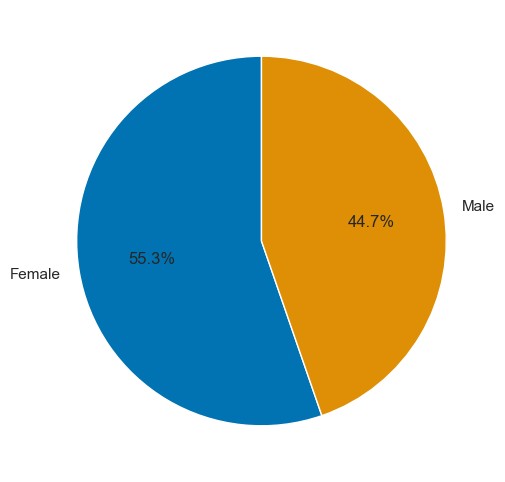

In [182]:
df = data['Sex'].value_counts()
plt.pie(df.values, labels = df.index, startangle = 90, colors = colors, 
        autopct = lambda x: "{:1.1f}%".format((x)))
plt.show()

<li> Females are responding more as compared to males. </li>

<li> Out of the total respondents, approximately 55% respondents were female and 45% were male. </li>

### Number of Respondents by Age and Gender

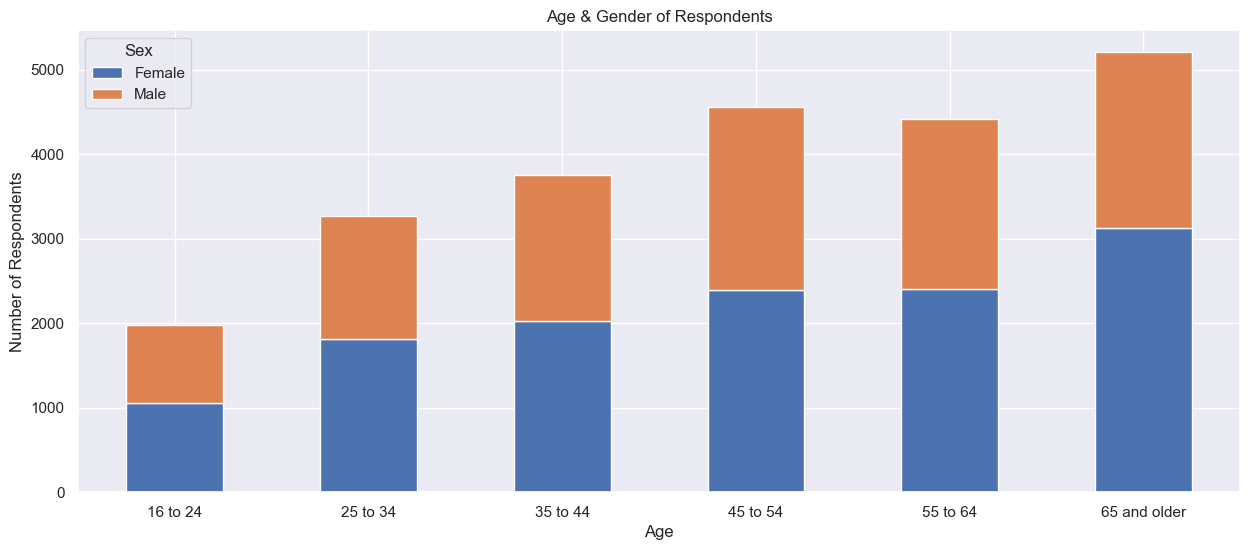

In [183]:
df = data.groupby(['Age'])['Sex'].value_counts().unstack().fillna(0)
df.plot(kind='bar', stacked=True)
plt.title('Age & Gender of Respondents')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0, ha='center')
plt.show()

### Education Level of the Respondents

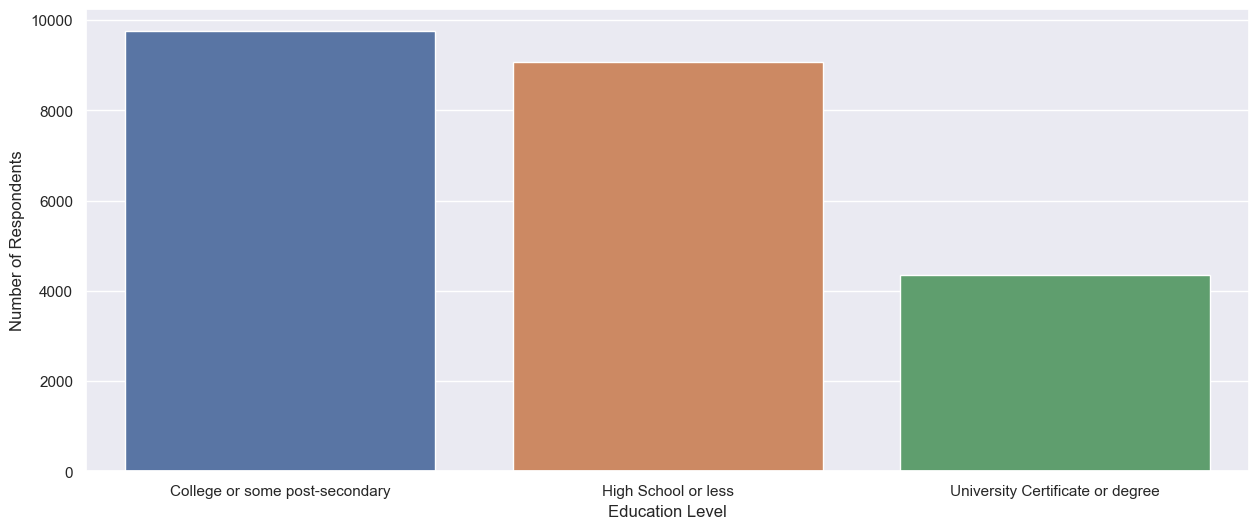

In [184]:
sns.countplot(x='Education', data=data, order = data['Education'].value_counts().index)
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.show()

<li> Nearly 10000 respondents have college or some post-secondary education. Those with some high school or lower in terms of education level constitute about 8000 of all the respondents. </li>

<li> The number of respondents who had university certificate or degree came a distant 3rd with the lowest count. </li>

### Empoyment Status of the Respondents

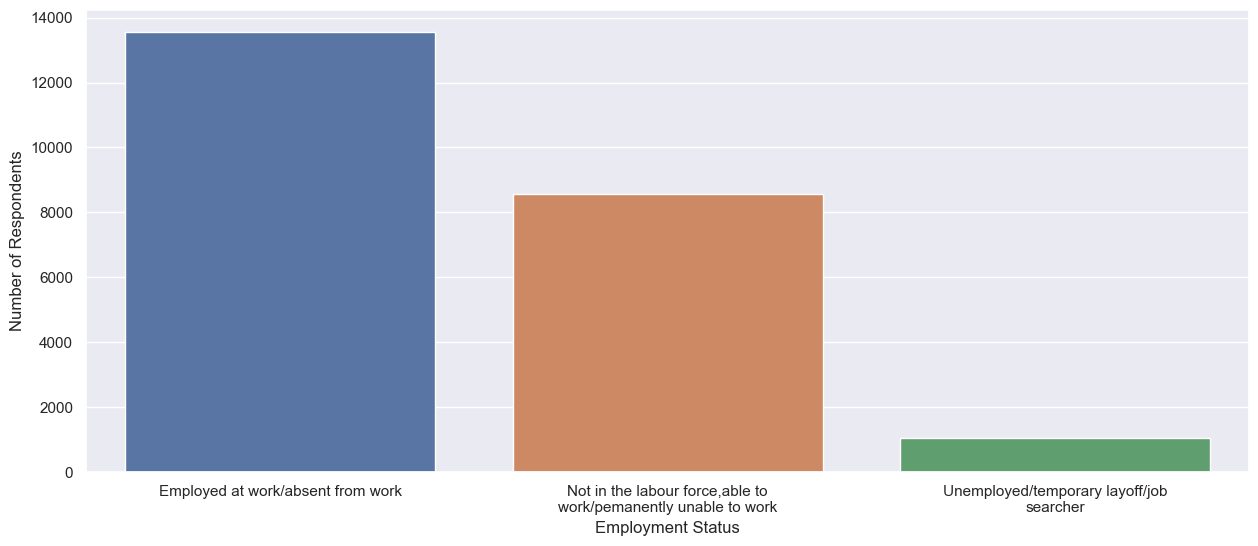

In [185]:
ax = sns.countplot(x='EmploymentStatus', data=data, order = data['EmploymentStatus'].value_counts().index)
labels = [textwrap.fill(label.get_text(), 35) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels);
plt.xlabel('Employment Status')
plt.ylabel('Number of Respondents')
plt.show()

<li> It was also observed that a majority (i.e.19000) of the respondents were employed; whether at work or present. The least of the respondents were those who were unemployed, temporarily laid off or actively seeking employment at about a 1000. </li>

<li> Those not in the labor force had the second highest number of respondents in the survey.  </li>

### Household Type of the Respondents

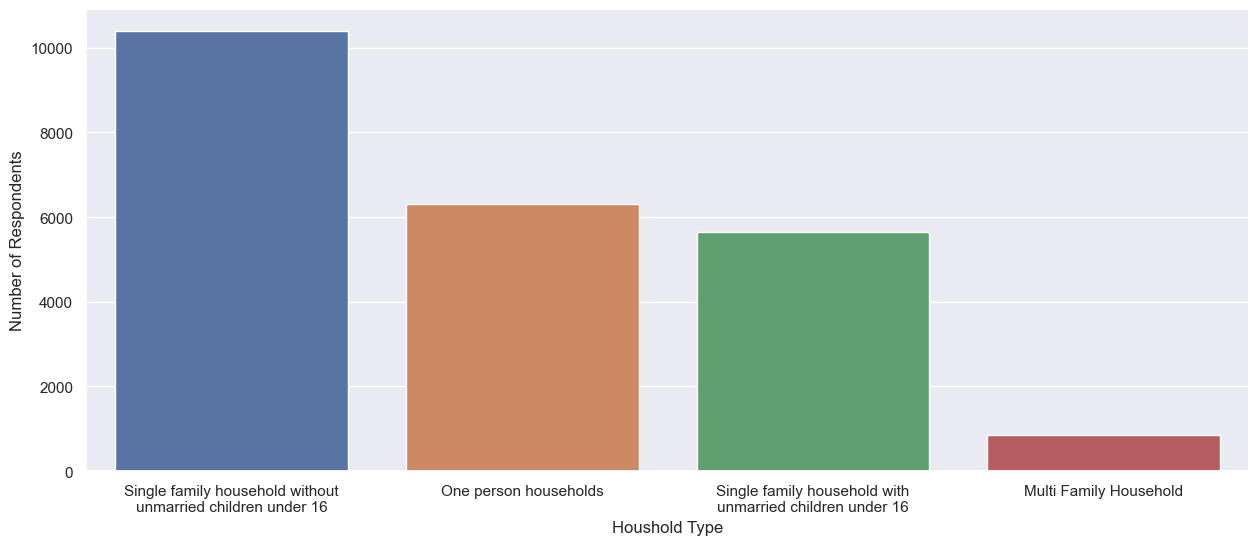

In [186]:
ax = sns.countplot(x='HousholdType', data=data, order = data['HousholdType'].value_counts().index)
labels = [textwrap.fill(label.get_text(), 35) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels);
plt.xlabel('Houshold Type')
plt.ylabel('Number of Respondents')
plt.show()

<li> Single family households without unmarried children under 16 years of age had a significantly higher number as compared to those one-person households and single-family households with unmarried children under 16 years of age at 2nd and 3rd respectively. </li>

<li> These two didn't have a significant difference between them in terms of numbers. </li>

### Highest Level of Education in the Respondent's Household

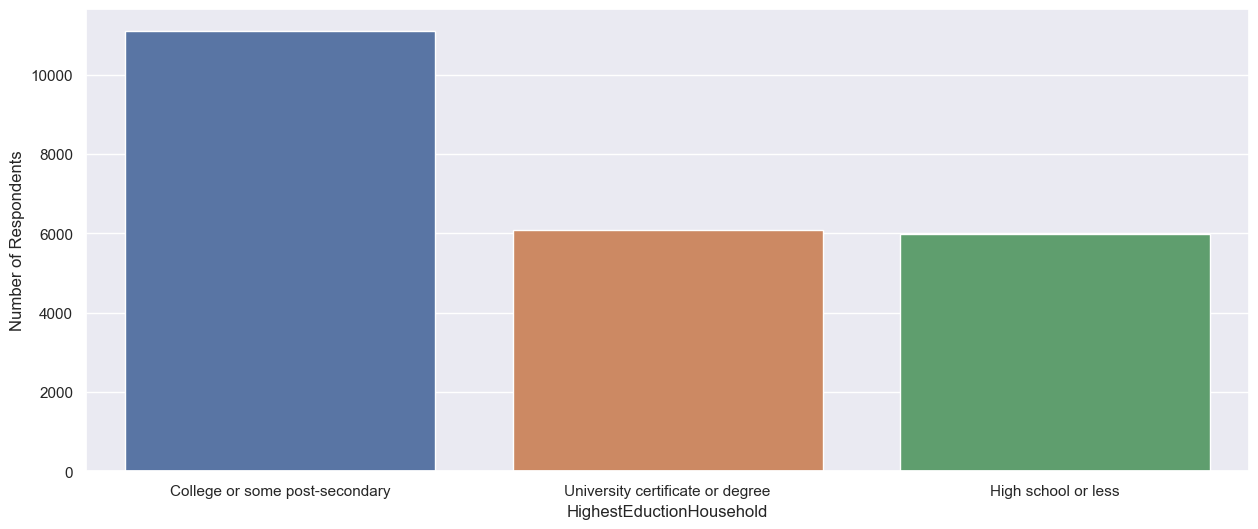

In [187]:
ax = sns.countplot(x='HighestEductionHousehold', data=data, order = data['HighestEductionHousehold'].value_counts().index)
labels = [textwrap.fill(label.get_text(), 35) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels);
plt.ylabel('Number of Respondents')
plt.show()

<li> The highest level of education of more than 9000 respondents were college or some post-secondary and there were equal respondents of 6000 whose education level is either university certificate or degree or high school or less  </li>

## 2.2 Survey Response Analysis

### Respondents' past internet usage

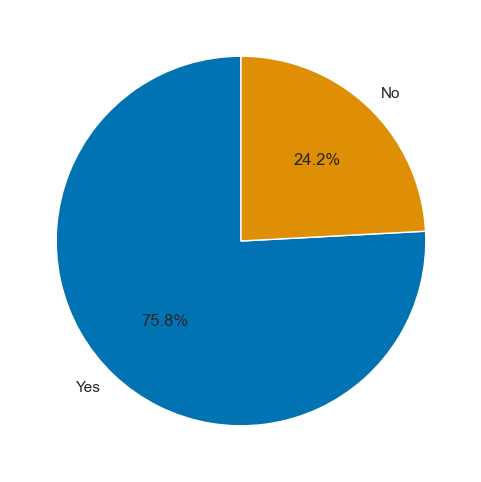

In [188]:
df = data['HaveUsedInternet'].value_counts()
plt.pie(df.values, labels = df.index, startangle = 90, colors = colors, 
        autopct = lambda x: "{:1.1f}%".format((x)))
plt.show()

<li> 76% respondents have used the internet in the past and 24% respondents have not used the same in the past. </li>

### Years respondent used the internet

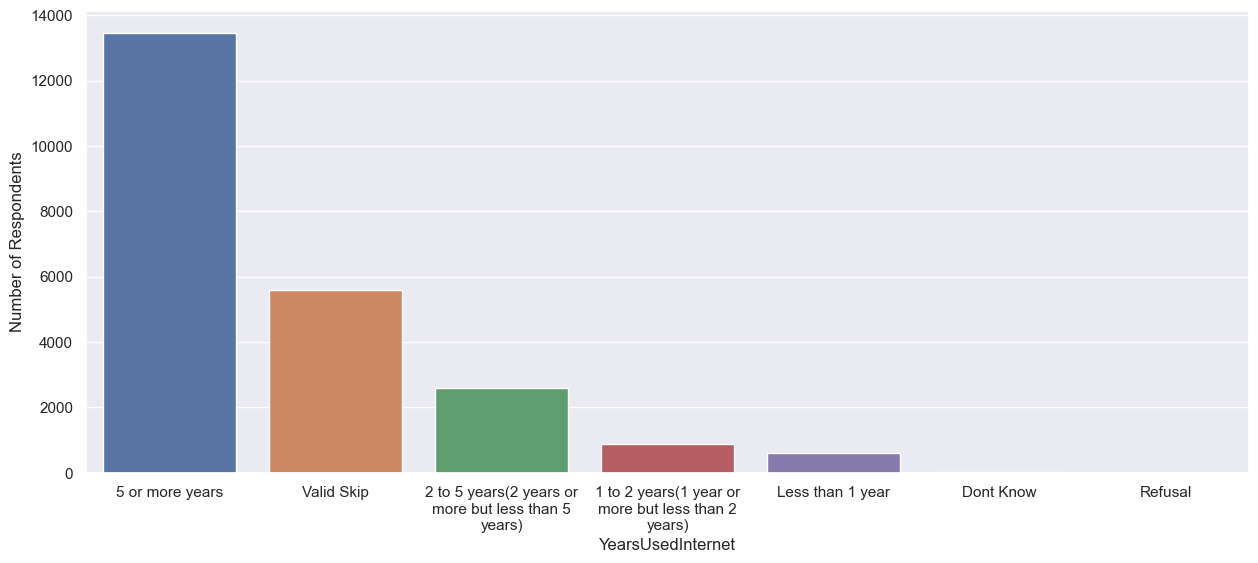

In [189]:
ax = sns.countplot(x='YearsUsedInternet', data=data, order = data['YearsUsedInternet'].value_counts().index)
labels = [textwrap.fill(label.get_text(), 25) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels);
plt.ylabel('Number of Respondents')
plt.show()

<li> More than 10000 respondents used the internet for 5 or more years and approximately 2500 respondents used the internet for 2 to 5 years. </li>

### Number of Respondents who use internet more than 40 hours per week by Age

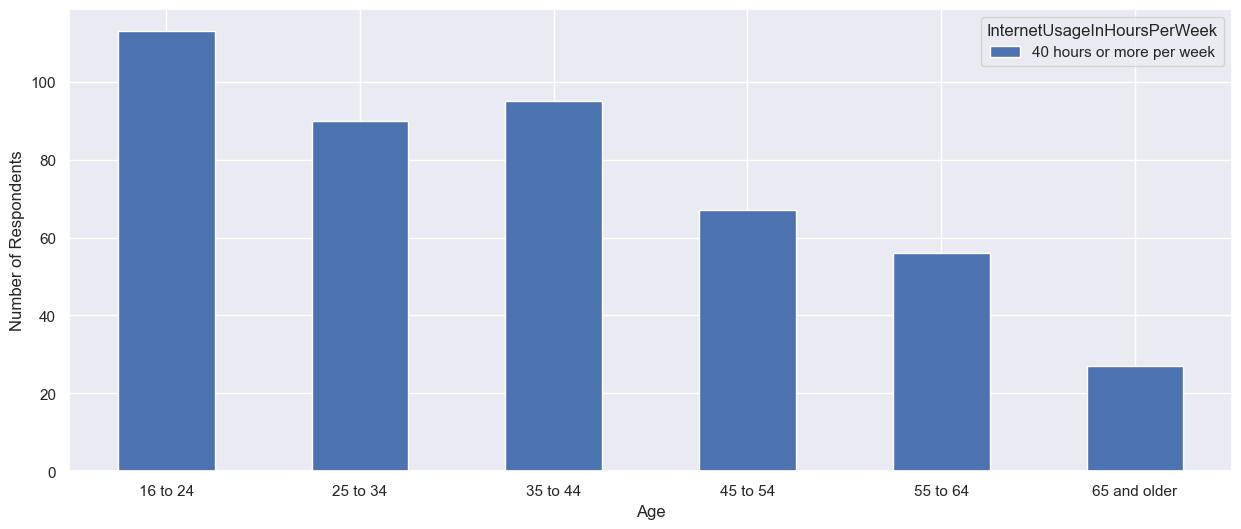

In [190]:
temp_df = data[data['InternetUsageInHoursPerWeek'] == '40 hours or more per week']
df = temp_df.groupby(['Age'])['InternetUsageInHoursPerWeek'].value_counts().unstack().fillna(0)
df.plot(kind='bar', stacked=True)
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0, ha='center')
plt.show()

<li> The youngest age group (16 to 24) are the heaviest internet users at more than 40 hours per week. </li>

<li> There’s an observed general reduction in internet usage across the age groups from youngest age group to then oldest but a slight deviation from the trend is noticed between the 25 to 34 and 35 to 44 age group. This might need to be investigated further for more insight. </li>

### Internet Usage by Gender

#### Chi-Square Contribution

In [191]:
# Create the new dataframe
Sex_InternetUsageperweek = pd.DataFrame({'Sex': data['Sex'], 
                                         'InternetUsageInHoursPerWeek': data['InternetUsageInHoursPerWeek']})

# Filter the rows of the dataframe
Sex_InternetUsageperweek = Sex_InternetUsageperweek[Sex_InternetUsageperweek['InternetUsageInHoursPerWeek'].
                            isin(['40 hours or more per week', 'Between 20 and 29 hours', 'Between 10 and 19 hours', 
                                  'Between 30 and 39 hours', 'Between 5 and 9 hours', 'Less than 5 hours'])]

# Create the counts table
table2 = pd.crosstab(Sex_InternetUsageperweek['Sex'], Sex_InternetUsageperweek['InternetUsageInHoursPerWeek'], margins = True)
print("Total Number of Respondents")
display(table2)

table2 = pd.crosstab(Sex_InternetUsageperweek['Sex'], Sex_InternetUsageperweek['InternetUsageInHoursPerWeek'])

# Create the tables with different proportions
table3 = round(table2.div(table2.sum(1)/100, axis=0),2)
table4 = round(table2.div(table2.sum(0)/100, axis=1),2)
table5 = round(table2.div(table2.sum().sum()/100),2)

print("N/Row Total")
display(table3)

print("N/Column Total")
display(table4)

print("N/Total Sum")
display(table5)

Total Number of Respondents


InternetUsageInHoursPerWeek,40 hours or more per week,Between 10 and 19 hours,Between 20 and 29 hours,Between 30 and 39 hours,Between 5 and 9 hours,Less than 5 hours,All
Sex,,,,,,,
Female,207,1319,457,199,2298,4169,8649
Male,241,1221,487,202,1905,3087,7143
All,448,2540,944,401,4203,7256,15792


N/Row Total


InternetUsageInHoursPerWeek,40 hours or more per week,Between 10 and 19 hours,Between 20 and 29 hours,Between 30 and 39 hours,Between 5 and 9 hours,Less than 5 hours
Sex,,,,,,
Female,2.39,15.25,5.28,2.30,26.57,48.20
Male,3.37,17.09,6.82,2.83,26.67,43.22


N/Column Total


InternetUsageInHoursPerWeek,40 hours or more per week,Between 10 and 19 hours,Between 20 and 29 hours,Between 30 and 39 hours,Between 5 and 9 hours,Less than 5 hours
Sex,,,,,,
Female,46.21,51.93,48.41,49.63,54.68,57.46
Male,53.79,48.07,51.59,50.37,45.32,42.54


N/Total Sum


InternetUsageInHoursPerWeek,40 hours or more per week,Between 10 and 19 hours,Between 20 and 29 hours,Between 30 and 39 hours,Between 5 and 9 hours,Less than 5 hours
Sex,,,,,,
Female,1.31,8.35,2.89,1.26,14.55,26.40
Male,1.53,7.73,3.08,1.28,12.06,19.55


### Internet Usage by Region

#### Chi-Square Contribution

In [192]:
# Create the new dataframe
Region_InternetUsageperweek = pd.DataFrame({'Province': data['Province'], 
                                         'InternetUsageInHoursPerWeek': data['InternetUsageInHoursPerWeek']})

# Filter the rows of the dataframe
Region_InternetUsageperweek = Region_InternetUsageperweek[Region_InternetUsageperweek['InternetUsageInHoursPerWeek'].
                            isin(['40 hours or more per week', 'Between 20 and 29 hours', 'Between 10 and 19 hours', 
                                  'Between 30 and 39 hours', 'Between 5 and 9 hours', 'Less than 5 hours'])]

# Create the counts table
table2 = pd.crosstab(Region_InternetUsageperweek['Province'], Region_InternetUsageperweek['InternetUsageInHoursPerWeek'], 
                     margins = True)
print("Total Number of Respondents")
display(table2)

table2 = pd.crosstab(Region_InternetUsageperweek['Province'], Region_InternetUsageperweek['InternetUsageInHoursPerWeek'])

# Create the tables with different proportions
table3 = round(table2.div(table2.sum(1)/100, axis=0),2)
table4 = round(table2.div(table2.sum(0)/100, axis=1),2)
table5 = round(table2.div(table2.sum().sum()/100),2)

print("N/Row Total")
display(table3)

print("N/Column Total")
display(table4)

print("N/Total Sum")
display(table5)

Total Number of Respondents


InternetUsageInHoursPerWeek,40 hours or more per week,Between 10 and 19 hours,Between 20 and 29 hours,Between 30 and 39 hours,Between 5 and 9 hours,Less than 5 hours,All
Province,,,,,,,
Alberta,50,265,115,53,459,714,1656
British Columbia,53,354,136,56,518,809,1926
Manitoba,41,188,72,29,341,593,1264
New Brunswick,18,115,41,17,170,310,671
Newfoundland and Labrador,11,74,28,9,139,257,518
Nova Scotia,19,143,42,24,215,377,820
Ontario,153,738,285,113,1217,2114,4620
Prince Edward Island,10,59,33,8,99,182,391
Quebec,65,424,128,64,764,1402,2847


N/Row Total


InternetUsageInHoursPerWeek,40 hours or more per week,Between 10 and 19 hours,Between 20 and 29 hours,Between 30 and 39 hours,Between 5 and 9 hours,Less than 5 hours
Province,,,,,,
Alberta,3.02,16.00,6.94,3.20,27.72,43.12
British Columbia,2.75,18.38,7.06,2.91,26.90,42.00
Manitoba,3.24,14.87,5.70,2.29,26.98,46.91
New Brunswick,2.68,17.14,6.11,2.53,25.34,46.20
Newfoundland and Labrador,2.12,14.29,5.41,1.74,26.83,49.61
Nova Scotia,2.32,17.44,5.12,2.93,26.22,45.98
Ontario,3.31,15.97,6.17,2.45,26.34,45.76
Prince Edward Island,2.56,15.09,8.44,2.05,25.32,46.55
Quebec,2.28,14.89,4.50,2.25,26.84,49.24


N/Column Total


InternetUsageInHoursPerWeek,40 hours or more per week,Between 10 and 19 hours,Between 20 and 29 hours,Between 30 and 39 hours,Between 5 and 9 hours,Less than 5 hours
Province,,,,,,
Alberta,11.16,10.43,12.18,13.22,10.92,9.84
British Columbia,11.83,13.94,14.41,13.97,12.32,11.15
Manitoba,9.15,7.40,7.63,7.23,8.11,8.17
New Brunswick,4.02,4.53,4.34,4.24,4.04,4.27
Newfoundland and Labrador,2.46,2.91,2.97,2.24,3.31,3.54
Nova Scotia,4.24,5.63,4.45,5.99,5.12,5.20
Ontario,34.15,29.06,30.19,28.18,28.96,29.13
Prince Edward Island,2.23,2.32,3.50,2.00,2.36,2.51
Quebec,14.51,16.69,13.56,15.96,18.18,19.32


N/Total Sum


InternetUsageInHoursPerWeek,40 hours or more per week,Between 10 and 19 hours,Between 20 and 29 hours,Between 30 and 39 hours,Between 5 and 9 hours,Less than 5 hours
Province,,,,,,
Alberta,0.32,1.68,0.73,0.34,2.91,4.52
British Columbia,0.34,2.24,0.86,0.35,3.28,5.12
Manitoba,0.26,1.19,0.46,0.18,2.16,3.76
New Brunswick,0.11,0.73,0.26,0.11,1.08,1.96
Newfoundland and Labrador,0.07,0.47,0.18,0.06,0.88,1.63
Nova Scotia,0.12,0.91,0.27,0.15,1.36,2.39
Ontario,0.97,4.67,1.80,0.72,7.71,13.39
Prince Edward Island,0.06,0.37,0.21,0.05,0.63,1.15
Quebec,0.41,2.68,0.81,0.41,4.84,8.88


### Internet Usage by Age

#### Chi-Square Contribution

In [193]:
# Create the new dataframe
Age_InternetUsageperweek = pd.DataFrame({'Age': data['Age'], 
                                         'InternetUsageInHoursPerWeek': data['InternetUsageInHoursPerWeek']})

# Filter the rows of the dataframe
Age_InternetUsageperweek = Age_InternetUsageperweek[Age_InternetUsageperweek['InternetUsageInHoursPerWeek'].
                            isin(['40 hours or more per week', 'Between 20 and 29 hours', 'Between 10 and 19 hours', 
                                  'Between 30 and 39 hours', 'Between 5 and 9 hours', 'Less than 5 hours'])]

table2 = pd.crosstab(Age_InternetUsageperweek['Age'], Age_InternetUsageperweek['InternetUsageInHoursPerWeek'], margins = True)

print("Total Number of Respondents")
display(table2)

table2 = pd.crosstab(Age_InternetUsageperweek['Age'], Age_InternetUsageperweek['InternetUsageInHoursPerWeek'])

# Create the tables with different proportions
table3 = round(table2.div(table2.sum(1)/100, axis=0),2)
table4 = round(table2.div(table2.sum(0)/100, axis=1),2)
table5 = round(table2.div(table2.sum()/100),2)

print("N/Row Total")
display(table3)

print("N/Column Total")
display(table4)

print("N/Total Sum")
display(table5)

Total Number of Respondents


InternetUsageInHoursPerWeek,40 hours or more per week,Between 10 and 19 hours,Between 20 and 29 hours,Between 30 and 39 hours,Between 5 and 9 hours,Less than 5 hours,All
Age,,,,,,,
16 to 24,113,400,173,84,535,461,1766
25 to 34,90,572,211,97,893,1004,2867
35 to 44,95,486,202,63,858,1521,3225
45 to 54,67,485,151,60,821,1813,3397
55 to 64,56,383,141,58,688,1511,2837
65 and older,27,214,66,39,408,946,1700
All,448,2540,944,401,4203,7256,15792


N/Row Total


InternetUsageInHoursPerWeek,40 hours or more per week,Between 10 and 19 hours,Between 20 and 29 hours,Between 30 and 39 hours,Between 5 and 9 hours,Less than 5 hours
Age,,,,,,
16 to 24,6.40,22.65,9.80,4.76,30.29,26.10
25 to 34,3.14,19.95,7.36,3.38,31.15,35.02
35 to 44,2.95,15.07,6.26,1.95,26.60,47.16
45 to 54,1.97,14.28,4.45,1.77,24.17,53.37
55 to 64,1.97,13.50,4.97,2.04,24.25,53.26
65 and older,1.59,12.59,3.88,2.29,24.00,55.65


N/Column Total


InternetUsageInHoursPerWeek,40 hours or more per week,Between 10 and 19 hours,Between 20 and 29 hours,Between 30 and 39 hours,Between 5 and 9 hours,Less than 5 hours
Age,,,,,,
16 to 24,25.22,15.75,18.33,20.95,12.73,6.35
25 to 34,20.09,22.52,22.35,24.19,21.25,13.84
35 to 44,21.21,19.13,21.40,15.71,20.41,20.96
45 to 54,14.96,19.09,16.00,14.96,19.53,24.99
55 to 64,12.50,15.08,14.94,14.46,16.37,20.82
65 and older,6.03,8.43,6.99,9.73,9.71,13.04


N/Total Sum


InternetUsageInHoursPerWeek,40 hours or more per week,Between 10 and 19 hours,Between 20 and 29 hours,Between 30 and 39 hours,Between 5 and 9 hours,Less than 5 hours
Age,,,,,,
16 to 24,25.22,15.75,18.33,20.95,12.73,6.35
25 to 34,20.09,22.52,22.35,24.19,21.25,13.84
35 to 44,21.21,19.13,21.40,15.71,20.41,20.96
45 to 54,14.96,19.09,16.00,14.96,19.53,24.99
55 to 64,12.50,15.08,14.94,14.46,16.37,20.82
65 and older,6.03,8.43,6.99,9.73,9.71,13.04


# 3 Summary of exploratory data analysis

The exploratory analysis of the data set as seen by the series of visualizations and tables generated revealed some interesting information of internet usage among the respondents. The method by which the survey was done revealed some disproportionately high number of respondents by demographics. However, the analysis helped reveal some interesting patterns in the usage of internet by individuals in Canada.

The analysis revealed that a high proportion of respondents was taken from the Ontario province, and a good proportion of participants are 65 years and older. This is noteworthy when further analysis is to be carried out as the disproportionate number of respondents from these variables might significantly mask other attribute values or influence the outcomes of further analysis if not taken into account.  An easier way to do this will be to ensure proper sampling methods are used to draw samples from the different provinces to ensure the Ontario region doesn’t mask analysis or interpretation from other regions. This will of course depend on the kind of future analysis to be performed on the dataset.

We also observed that for all the dimensions or attributes considered in internet usage, the distribution or variation of internet usage was similar across all the provinces for age, education, gender and status (household occupants or students). This implies that individual provincial analysis of internet users might not provide additional or any further useful information due to the similarity across all the provinces.

The exploratory analysis revealed interesting variations or differences in the pattern of internet usage among gender, age group, educational level, status (student or household respondents), period of usage or time of the day and frequency of use. Further analysis (as predictive analysis and other necessary analytics) will be focused on these attributes to reveal further insights that might be useful in decision-making by stakeholders.



# 4 Predictive Analysis

## Preparing data for predictive analysis

In [194]:
# Subset the dataframe to remove rows where InternetUsage, InternetUsageInHoursPerWeek and YearsUsedInternet is 
# 'Don't Know', 'Not Stated', 'Refusal'
data1 = data[data['InternetUsage'].isin(['Don\'t Know','Not Stated','Refusal']) == False]
data2 = data1[data1['InternetUsageInHoursPerWeek'].isin(['Don\'t Know','Not Stated','Refusal']) == False]
data3 = data2[data2['YearsUsedInternet'].isin(['Don\'t Know','Refusal']) == False]

# Select the columns for data_prediction
data_prediction = data3[['Age', 'Sex', 'Education', 'IsStudent', 'YearsUsedInternet', 'InternetUsage', 
                         'InternetUsageInHoursPerWeek']]

# Create a new column 'New_InternetUsageInHoursPerWeek'
data_prediction['New_InternetUsageInHoursPerWeek'] = data_prediction['InternetUsageInHoursPerWeek']
data_prediction.loc[data_prediction['InternetUsageInHoursPerWeek'] == "Less than 5 hours", 'New_InternetUsageInHoursPerWeek'] = "Less than 5 hours"
data_prediction.loc[data_prediction['InternetUsageInHoursPerWeek'].isin(["Between 5 and 9 hours","Between 10 and 19 hours"]), 'New_InternetUsageInHoursPerWeek'] = "Between 5 and 19 hours"
data_prediction.loc[data_prediction['InternetUsageInHoursPerWeek'].isin(["Between 20 and 29 hours","Between 30 and 39 hours"]), 'New_InternetUsageInHoursPerWeek'] = "Between 20 and 39 hours"
data_prediction.loc[data_prediction['InternetUsageInHoursPerWeek'] == "40 hours or more per week", 'New_InternetUsageInHoursPerWeek'] = "40 hours or more per week"
data_prediction.loc[data_prediction['InternetUsageInHoursPerWeek'] == "Valid Skip", 'New_InternetUsageInHoursPerWeek'] = "Valid Skip"


data_prediction.drop('InternetUsageInHoursPerWeek', inplace=True, axis = 1)

C:\Users\HP\AppData\Local\Temp\ipykernel_3540\2345682050.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prediction['New_InternetUsageInHoursPerWeek'] = data_prediction['InternetUsageInHoursPerWeek']
C:\Users\HP\AppData\Local\Temp\ipykernel_3540\2345682050.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prediction.drop('InternetUsageInHoursPerWeek', inplace=True, axis = 1)


I removed all the rows with values "Don't Know", "Not Stated" and "Refusal" in the columns 
InternetUsage, InternetUsageInHoursPerWeek and YearsUsedInternet. 
The reason we deleted these rows is that these values does not imply any useful meaning to the 
data and these values were representing less than 1% of data for any specific column. 

I have created a new column named 'New_InternetUsageInHoursPerWeek' to reduce the number of class from 7 to 5 for our prediction variable. 

## Data used for predictive analysis

In [195]:
data_prediction.head()

,Age,Sex,Education,IsStudent,YearsUsedInternet,InternetUsage,New_InternetUsageInHoursPerWeek
0,35 to 44,Female,University Certificate or degree,No,1 to 2 years(1 year or more but less than 2 ye...,At least once a week(but not everyday),Less than 5 hours
1,16 to 24,Female,High School or less,Yes,5 or more years,At least once a day,Less than 5 hours
2,25 to 34,Male,College or some post-secondary,No,5 or more years,At least once a day,Between 5 and 19 hours
3,55 to 64,Female,College or some post-secondary,No,2 to 5 years(2 years or more but less than 5 y...,Valid Skip,Valid Skip
4,35 to 44,Male,College or some post-secondary,No,1 to 2 years(1 year or more but less than 2 ye...,At least once a month(but not every week),Less than 5 hours


## Predictive Analysis using Naïve Bayes Algorithm

Naïve Bayes is the simplest and fastest classification algorithm for a large chunk of data. Naïve Bayes classifier is used successfully in various applications such as spam filtering, text classification, sentiment analysis, and recommendation systems. It uses the Bayes probability theorem for unknown class prediction. A Naïve Bayes classifier works by figuring out the probability of different attributes of the data being associated with a certain class. This is based on Bayes’ theorem.

I have used categorical naive bayes model to predict the internet usage of a respondent. <br>
1. Less than 5 hours a week <br>
2. Between 5 to 19 hours a week <br>
3. Between 20 to 39 hours a week <br>
4. More than 40 hours a week <br>
5. Valid Skip

## Encoding Categorical Variables and Dividing Data into Training and Testing Set

In [196]:
le = LabelEncoder()
data_prediction['Age'] = le.fit_transform(data_prediction['Age'])
data_prediction['Sex'] = le.fit_transform(data_prediction['Sex'])
data_prediction['Education'] = le.fit_transform(data_prediction['Education'])
data_prediction['IsStudent'] = le.fit_transform(data_prediction['IsStudent'])
data_prediction['YearsUsedInternet'] = le.fit_transform(data_prediction['YearsUsedInternet'])
data_prediction['InternetUsage'] = le.fit_transform(data_prediction['InternetUsage'])
data_prediction['New_InternetUsageInHoursPerWeek'] = le.fit_transform(data_prediction['New_InternetUsageInHoursPerWeek'])

X_train, X_test, y_train, y_test = train_test_split(data_prediction[['Age', 'Sex', 'Education', 'IsStudent', 'YearsUsedInternet', 
                                                                     'InternetUsage']], 
                                                    data_prediction['New_InternetUsageInHoursPerWeek'], test_size=0.3, 
                                                    random_state=123, shuffle=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3540\413793283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prediction['Age'] = le.fit_transform(data_prediction['Age'])
C:\Users\HP\AppData\Local\Temp\ipykernel_3540\413793283.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prediction['Sex'] = le.fit_transform(data_prediction['Sex'])
C:\Users\HP\AppData\Local\Temp\ipykernel_3540\413793283.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

### Training the Naive Bayes Algorithm

In [197]:
# Building the Naive Bayes model
nbmodel = CategoricalNB(alpha=0.01)
nb = nbmodel.fit(X_train,y_train)

### Evaluating Algorithm Performance : Model Accuracy

In [198]:
pred_labels = nb.predict(X_test)

# Classification Report
print(classification_report(y_test, pred_labels, zero_division = 1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       133
           1       1.00      0.00      0.00       412
           2       0.54      0.83      0.65      2069
           3       0.75      0.54      0.63      2127
           4       1.00      1.00      1.00      2185

    accuracy                           0.73      6926
   macro avg       0.86      0.47      0.46      6926
weighted avg       0.78      0.73      0.70      6926

